In [252]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflowjs as tfjs
print(tf.__version__)
print(pd.__version__)

2.9.0
1.5.3


In [253]:
df = pd.read_csv('fertilizer_amount_dataset.csv')
df


,P,hujan,curahhujan,jenistanaman,teksturtanah,area,pupuk
0,56,71.075622,Sangat Ringan,jagung,Lempung,17800,251
1,36,73.336361,Ringan,jagung,Lempung,19500,227
2,43,99.579812,Ringan,jagung,Lempung Berpasir,28300,566
3,44,102.266244,Ringan,jagung,Lempung Berpasir,14400,307
4,47,104.162615,Ringan,jagung,Lempung Berpasir,25700,580
...,...,...,...,...,...,...,...
895,34,177.774507,Ringan,kopi,Lempung Berpasir,17600,1117
896,15,127.924610,Ringan,kopi,Lempung Berpasir,12000,641
897,33,173.322839,Ringan,kopi,Lempung,16000,726
898,32,127.175293,Ringan,kopi,Lempung,15300,678


In [254]:
df['jenistanaman'] = df['jenistanaman'].astype('category')
df['jenistanaman'] = df['jenistanaman'].cat.codes
df['teksturtanah'] = df['teksturtanah'].astype('category')
df['teksturtanah'] = df['teksturtanah'].cat.codes
df['curahhujan'] = df['curahhujan'].astype('category')
df['curahhujan'] = df['curahhujan'].cat.codes
df


,P,hujan,curahhujan,jenistanaman,teksturtanah,area,pupuk
0,56,71.075622,1,1,0,17800,251
1,36,73.336361,0,1,0,19500,227
2,43,99.579812,0,1,1,28300,566
3,44,102.266244,0,1,1,14400,307
4,47,104.162615,0,1,1,25700,580
...,...,...,...,...,...,...,...
895,34,177.774507,0,5,1,17600,1117
896,15,127.924610,0,5,1,12000,641
897,33,173.322839,0,5,0,16000,726
898,32,127.175293,0,5,0,15300,678


In [255]:

# convert categorical 'jenistanaman' data into one-hot data
jenistanaman = df.pop('jenistanaman')
df['Padi'] = (jenistanaman == 7)*1
df['Jagung'] = (jenistanaman == 1)*1
df['Kacang Merah'] = (jenistanaman == 4)*1
df['Kacang Hijau'] = (jenistanaman == 3)*1
df['Semangka'] = (jenistanaman == 8)*1
df['Melon'] = (jenistanaman == 6)*1
df['Apel'] = (jenistanaman == 0)*1
df['Jeruk'] = (jenistanaman == 2)*1
df['Kopi'] = (jenistanaman == 5)*1

# convert categorical 'teksturtanah' data into one-hot data
tt = df.pop('teksturtanah')
df['Lempung'] = (tt == 0)*1
df['Lempung Berpasir'] = (tt == 1)*1
df['Pasir Berlempung'] = (tt == 3)*1
df['Liat Berpasir'] = (tt == 2)*1

column_to_move = df.pop("pupuk")

# insert column with insert(location, column_name, column_value)

df.insert(0, "pupuk", column_to_move)
df



,pupuk,P,hujan,curahhujan,area,Padi,Jagung,Kacang Merah,Kacang Hijau,Semangka,Melon,Apel,Jeruk,Kopi,Lempung,Lempung Berpasir,Pasir Berlempung,Liat Berpasir
0,251,56,71.075622,1,17800,0,1,0,0,0,0,0,0,0,1,0,0,0
1,227,36,73.336361,0,19500,0,1,0,0,0,0,0,0,0,1,0,0,0
2,566,43,99.579812,0,28300,0,1,0,0,0,0,0,0,0,0,1,0,0
3,307,44,102.266244,0,14400,0,1,0,0,0,0,0,0,0,0,1,0,0
4,580,47,104.162615,0,25700,0,1,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,1117,34,177.774507,0,17600,0,0,0,0,0,0,0,0,1,0,1,0,0
896,641,15,127.924610,0,12000,0,0,0,0,0,0,0,0,1,0,1,0,0
897,726,33,173.322839,0,16000,0,0,0,0,0,0,0,0,1,1,0,0,0
898,678,32,127.175293,0,15300,0,0,0,0,0,0,0,0,1,1,0,0,0


In [256]:
df = df.drop(columns=(['curahhujan','hujan','P']))
dataset = df.values
df

,pupuk,area,Padi,Jagung,Kacang Merah,Kacang Hijau,Semangka,Melon,Apel,Jeruk,Kopi,Lempung,Lempung Berpasir,Pasir Berlempung,Liat Berpasir
0,251,17800,0,1,0,0,0,0,0,0,0,1,0,0,0
1,227,19500,0,1,0,0,0,0,0,0,0,1,0,0,0
2,566,28300,0,1,0,0,0,0,0,0,0,0,1,0,0
3,307,14400,0,1,0,0,0,0,0,0,0,0,1,0,0
4,580,25700,0,1,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,1117,17600,0,0,0,0,0,0,0,0,1,0,1,0,0
896,641,12000,0,0,0,0,0,0,0,0,1,0,1,0,0
897,726,16000,0,0,0,0,0,0,0,0,1,1,0,0,0
898,678,15300,0,0,0,0,0,0,0,0,1,1,0,0,0


In [257]:
X = dataset[:, 1:]
y = dataset[:, 0:1]
X

array([[17800,     0,     1, ...,     0,     0,     0],
       [19500,     0,     1, ...,     0,     0,     0],
       [28300,     0,     1, ...,     1,     0,     0],
       ...,
       [16000,     0,     0, ...,     0,     0,     0],
       [15300,     0,     0, ...,     0,     0,     0],
       [10100,     0,     0, ...,     0,     0,     0]], dtype=int64)

In [258]:
from tensorflow.keras.layers.experimental import preprocessing
import numpy as np

# Normalization
normalizer = preprocessing.Normalization()

# adapt to the data
normalizer.adapt(np.array(X))
print(normalizer.mean.numpy())

[[1.94654434e+04 1.11111090e-01 1.11111090e-01 1.11111090e-01
  1.11111090e-01 1.11111112e-01 1.11111104e-01 1.11111104e-01
  1.11111112e-01 1.11111119e-01 3.33333284e-01 4.51111138e-01
  1.08888872e-01 1.06666654e-01]]


In [282]:

def build_model():
    model = keras.Sequential([
        layers.Dense(256, activation='relu', input_shape=[14]),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
    
    model.compile(optimizer=optimizer,
                  loss='mse',
                  metrics=['mse', 'mae'])
    
    return model


In [260]:
model = build_model()
#!pip install git+https://github.com/tensorflow/docs


In [261]:
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling

In [263]:
EPOCHS = 4000
history = model.fit(X, y, epochs=EPOCHS, verbose = 0, callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:47915.3438,  mae:125.7236,  mse:47915.3438,  
....................................................................................................
Epoch: 100, loss:40181.5703,  mae:128.7455,  mse:40181.5703,  
....................................................................................................
Epoch: 200, loss:46538.0664,  mae:128.7347,  mse:46538.0664,  
....................................................................................................
Epoch: 300, loss:39690.1094,  mae:129.8330,  mse:39690.1094,  
....................................................................................................
Epoch: 400, loss:37755.1172,  mae:127.3010,  mse:37755.1172,  
....................................................................................................
Epoch: 500, loss:42853.7461,  mae:126.2481,  mse:42853.7461,  
....................................................................................................
Epoch: 600, loss:

In [271]:
from sklearn.metrics import r2_score
r2_score(y, test_predictions)

0.9404885481975457

29/29 [==============================] - 0s 1ms/step


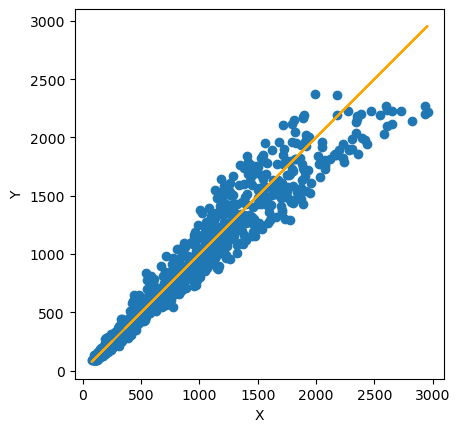

In [270]:
import matplotlib.pyplot as plt
test_predictions = model.predict(X).flatten()
a = plt.axes(aspect='equal')
plt.scatter(y, test_predictions)
plt.xlabel('X')
plt.ylabel('Y')
_=plt.plot(y,y,color='orange')

In [273]:
df

,pupuk,area,Padi,Jagung,Kacang Merah,Kacang Hijau,Semangka,Melon,Apel,Jeruk,Kopi,Lempung,Lempung Berpasir,Pasir Berlempung,Liat Berpasir
0,251,17800,0,1,0,0,0,0,0,0,0,1,0,0,0
1,227,19500,0,1,0,0,0,0,0,0,0,1,0,0,0
2,566,28300,0,1,0,0,0,0,0,0,0,0,1,0,0
3,307,14400,0,1,0,0,0,0,0,0,0,0,1,0,0
4,580,25700,0,1,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,1117,17600,0,0,0,0,0,0,0,0,1,0,1,0,0
896,641,12000,0,0,0,0,0,0,0,0,1,0,1,0,0
897,726,16000,0,0,0,0,0,0,0,0,1,1,0,0,0
898,678,15300,0,0,0,0,0,0,0,0,1,1,0,0,0


In [274]:
import numpy as np
# 678	15300	0	0	0	0	0	0	0	0	1	1	0	0	0
# 1117	17600	0	0	0	0	0	0	0	0	1	0	1	0	0

model.predict(np.array([[15300,0,0,0,0,0,0,0,0,1,1,0,0,0],[17600,0,0,0,0,0,0,0,0,1,0,1,0,0]]))
#df

1/1 [==============================] - 0s 73ms/step


array([[667.55145],
       [975.8958 ]], dtype=float32)

In [283]:
model.save('model.h5')

In [284]:
tf.keras.models.load_model('model.h5')



In [285]:
#Export the saved model
import pathlib
import tflite as tflite

export_dir = 'fortflite_2/'
tf.saved_model.save(model, export_dir)

INFO:tensorflow:Assets written to: fortflite_2/assets


INFO:tensorflow:Assets written to: fortflite_2/assets


In [286]:
#Convert the model

converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()


In [287]:
#Save the model

tflite_model_file = pathlib.Path('mlmodel_4.tflite')
tflite_model_file.write_bytes(tflite_model)

182544

In [289]:
import tensorflow as tf

interpreter = tf.lite.Interpreter(model_path='mlmodel_4.tflite')
interpreter.allocate_tensors()

In [290]:
input_details = interpreter.get_input_details()
input_shape = input_details[0]['shape']
input_data_type = input_details[0]['dtype']
input_shape


array([ 1, 14])